In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [2]:
Reviews=pd.read_csv(r'C:\Users\sabri\Google Drive\LSE Materials\Assignments\Course 3\Assignment Files\turtle_reviews.csv')
Reviews.info()
Reviews.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gender                  2000 non-null   object 
 1   age                     2000 non-null   int64  
 2   remuneration (k£)       2000 non-null   float64
 3   spending_score (1-100)  2000 non-null   int64  
 4   loyalty_points          2000 non-null   int64  
 5   education               2000 non-null   object 
 6   language                2000 non-null   object 
 7   platform                2000 non-null   object 
 8   product                 2000 non-null   int64  
 9   review                  2000 non-null   object 
 10  summary                 2000 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 172.0+ KB


,gender,age,remuneration (k£),spending_score (1-100),loyalty_points,education,language,platform,product,review,summary
0,Male,18,12.30,39,210,graduate,EN,Web,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,EN,Web,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,EN,Web,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,EN,Web,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,EN,Web,291,As my review of GF9's previous screens these w...,Money trap


In [ ]:
Reviews.isnull().sum()

In [16]:
Reviews.describe()

,age,remuneration (k£),spending_score (1-100),loyalty_points,product
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,39.495000,48.079060,50.000000,1578.032000,4320.521500
std,13.573212,23.123984,26.094702,1283.239705,3148.938839
min,17.000000,12.300000,1.000000,25.000000,107.000000
25%,29.000000,30.340000,32.000000,772.000000,1589.250000
50%,38.000000,47.150000,50.000000,1276.000000,3624.000000
75%,49.000000,63.960000,73.000000,1751.250000,6654.000000
max,72.000000,112.340000,99.000000,6847.000000,11086.000000


In [3]:
Reviews_clean=Reviews.drop(['language','platform'], axis=1)
Reviews_clean.to_csv(r'C:\Users\sabri\Google Drive\LSE Materials\Assignments\Course 3\Assignment Files\Reviews_clean.csv')

In [4]:
Reviews_clean.rename(columns={'remuneration (k£)':'remuneration','spending_score (1-100)':'spending_score'},inplace=True)
Reviews_clean.head()

,gender,age,remuneration,spending_score,loyalty_points,education,product,review,summary
0,Male,18,12.30,39,210,graduate,453,"When it comes to a DM's screen, the space on t...",The fact that 50% of this space is wasted on a...
1,Male,23,12.30,81,524,graduate,466,An Open Letter to GaleForce9*:\n\nYour unpaint...,Another worthless Dungeon Master's screen from...
2,Female,22,13.12,6,40,graduate,254,"Nice art, nice printing. Why two panels are f...","pretty, but also pretty useless"
3,Female,25,13.12,77,562,graduate,263,Amazing buy! Bought it as a gift for our new d...,Five Stars
4,Female,33,13.94,40,366,graduate,291,As my review of GF9's previous screens these w...,Money trap


In [ ]:
y=Reviews_clean['loyalty_points']
X=Reviews_clean[['age','remuneration','spending_score']]
mlr=linear_model.LinearRegression()

In [ ]:
mlr.fit(X,y)
y_pred=mlr.predict(X)

In [ ]:
print(mlr.score(X,y))

In [ ]:
print(mlr.intercept_)

In [ ]:
list(zip(X,mlr.coef_))

In [ ]:
model=sm.OLS(y,sm.add_constant(X)).fit()

In [ ]:
model.summary()

In [ ]:
print(metrics.mean_absolute_error(y,y_pred))

In [ ]:
print(metrics.mean_squared_error(y,y_pred))

In [ ]:
model=sms.het_breuschpagan(model.resid,model.model.exog)

#Begin Assignment Activity 2: k means cluster analysis

In [5]:
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='remuneration', ylabel='spending_score'>

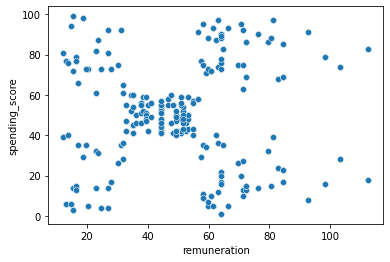

In [6]:
sns.scatterplot(x='remuneration', y='spending_score',data=Reviews_clean)

In [7]:
x=Reviews_clean[['remuneration','spending_score']]

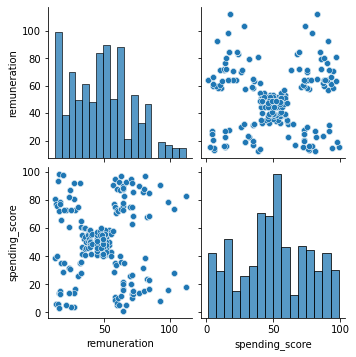

In [8]:
sns.pairplot(Reviews_clean,vars=x)

In [9]:
from sklearn.cluster import KMeans

In [ ]:
cs=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    cs.append(kmeans.inertia_)

In [ ]:
plt.plot(range(1,11),cs,marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('cs')
plt.show()

In [10]:
from sklearn.metrics import silhouette_score
sil=[]
k_max=10

In [ ]:
for k in range(2,k_max+1):
    kmeans_s=KMeans(n_clusters=k).fit(x)
    labels=kmeans_s.labels_
    sil.append(silhouette_score(x,labels,metric='euclidean'))
    

In [ ]:
plt.plot(range(2,k_max+1),sil,marker='o')
plt.title('Silhouette Method')
plt.xlabel('Number of Clusters')
plt.ylabel('sil')
plt.show()

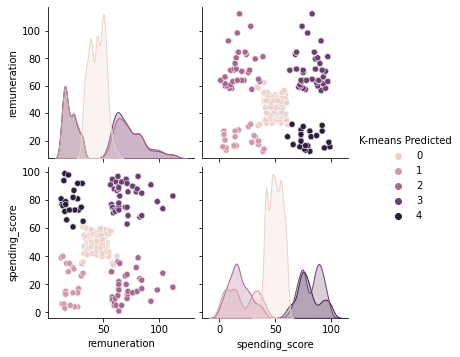

In [12]:
kmeans=KMeans(n_clusters=5,max_iter=15000,init='k-means++',random_state=0)
kmeans.fit(x)
clusters=kmeans.labels_
x['K-means Predicted']=clusters

sns.pairplot(x,hue='K-means Predicted', diag_kind='kde')





In [14]:
x['K-means Predicted'].value_counts()


0    774
3    356
2    330
1    271
4    269
Name: K-means Predicted, dtype: int64

In [15]:
print(x.head())

   remuneration  spending_score  K-means Predicted
0         12.30              39                  1
1         12.30              81                  4
2         13.12               6                  1
3         13.12              77                  4
4         13.94              40                  1
